NETFLIX DATA :CLEANING, ANALYSIS and VISUALIZATION by GUDE PAVAN NAREN

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Upload the Dataset

In [3]:
data = pd.read_csv("../Netflix_data/Data/netflix_titles.csv")

In [7]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Inspection


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Cleaning

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

np.int64(0)

In [11]:
data['date_added'] = data['date_added'].astype(str).str.strip()


In [12]:
data['date_added'] = pd.to_datetime(
    data['date_added'],
    errors='coerce'
)


In [15]:
data['date_added'].head()


0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [13]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
data['country']=data['country'].replace('Not Given',np.nan)

In [16]:
data['country']=data['country'].fillna('Unknown')

Split Genres+Directors

In [17]:
data['listed_in']=data['listed_in'].str.split(',')
data=data.explode('listed_in')

In [18]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [19]:
data['directors']=data['director'].str.split(',')
data=data.explode('director')


Duration Cleaning


In [20]:
data['duration_num']=data['duration'].str.extract(r'(\d+)').astype(float)

Feature Engineering

In [21]:
data['year_added']=data['date_added'].dt.year

In [22]:
data['month_added']=data['date_added'].dt.month

In [23]:
data['content_age']=2025-data['release_year']

VISUALIZATION


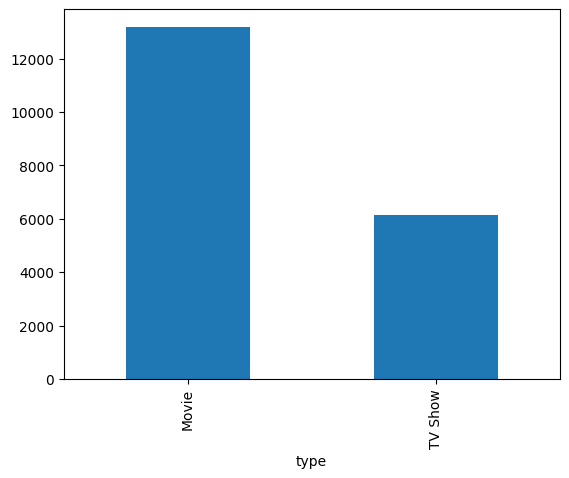

In [24]:
#Movies VS Tv shows
data['type'].value_counts().plot(kind='bar')
plt.show()

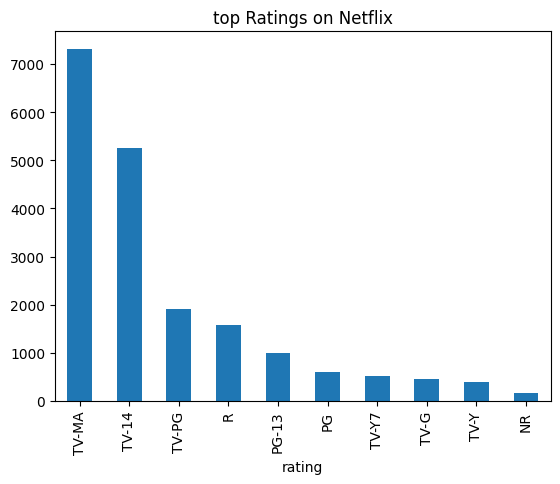

In [25]:
#rating distribution
data['rating'].value_counts().head(10).plot(kind='bar')
plt.title("top Ratings on Netflix")
plt.show()

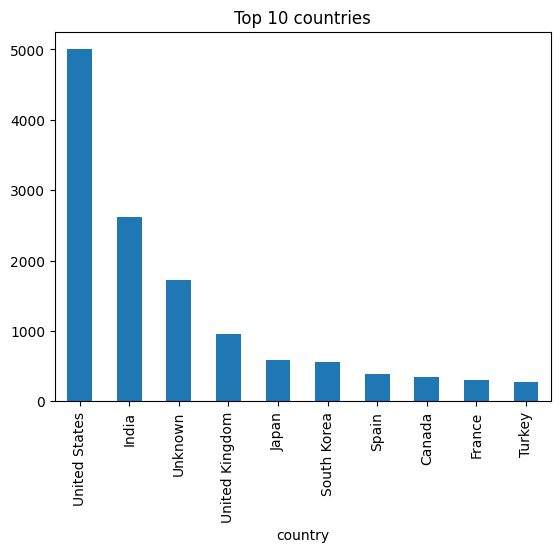

In [26]:
#True Top Countries
data['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 countries")
plt.show()

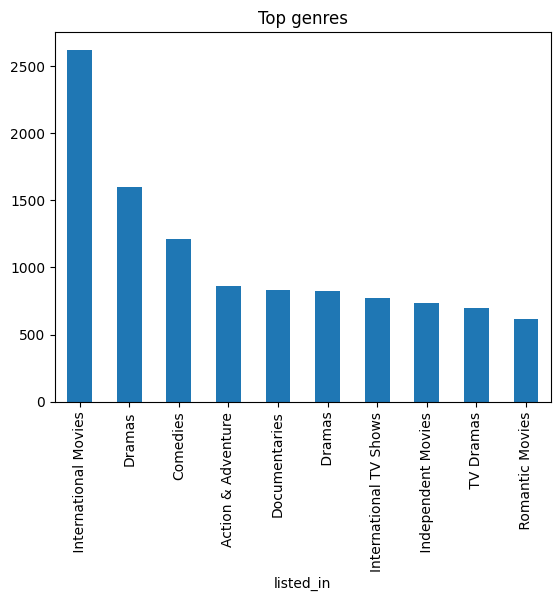

In [27]:
#True Top Genres
data['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title("Top genres")
plt.show()

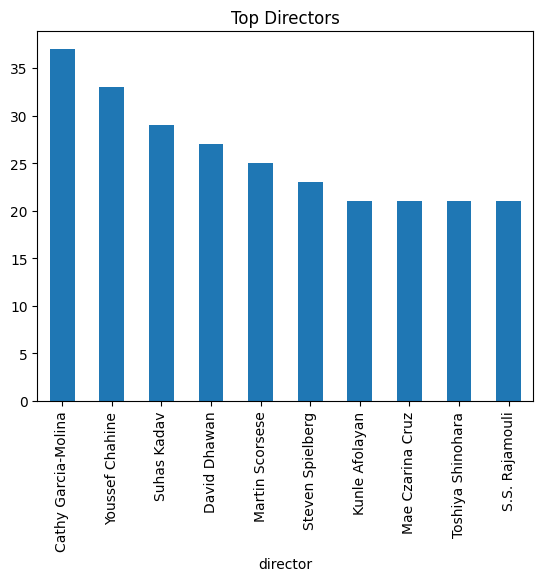

In [28]:
#True Top Directors
data['director'].value_counts().head(10).plot(kind='bar')
plt.title("Top Directors")
plt.show()

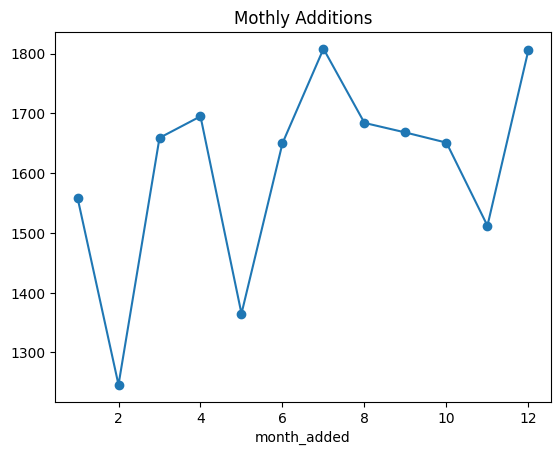

In [29]:
data.groupby('month_added').size().plot(marker='o')
plt.title('Mothly Additions')
plt.show()
     

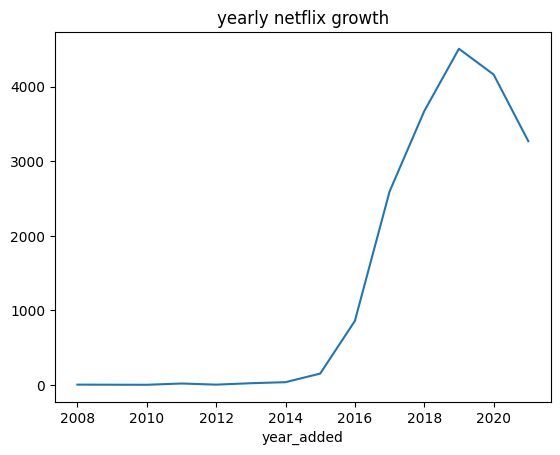

In [30]:
#Yearly Trend
data.groupby('year_added').size().plot()
plt.title('yearly netflix growth')
plt.show()

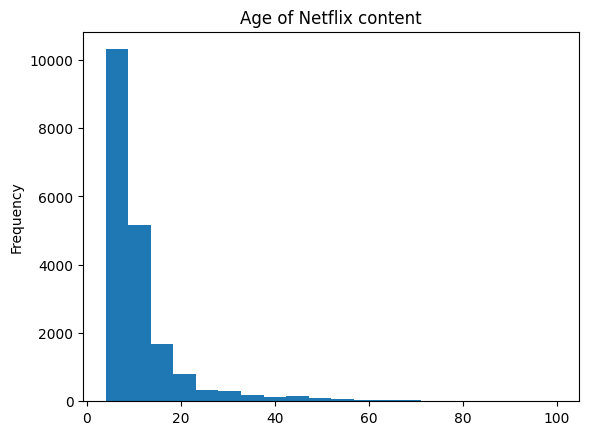

In [31]:
#Content Age Distribution
data['content_age'].plot(kind='hist',bins=20)
plt.title('Age of Netflix content')
plt.show()

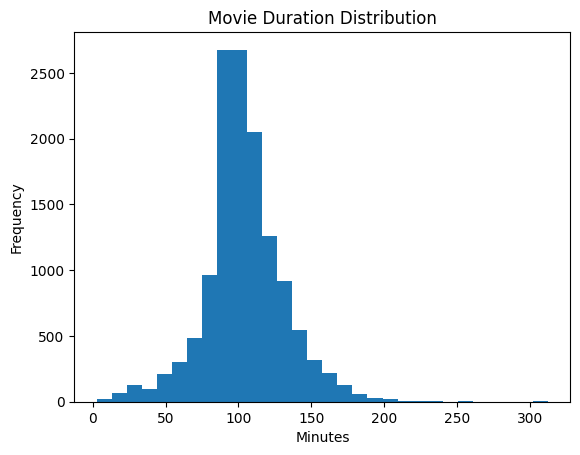

In [32]:
#Movie Duration Distribution
data[data['type']=="Movie"]['duration_num'].dropna().plot(kind='hist', bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()


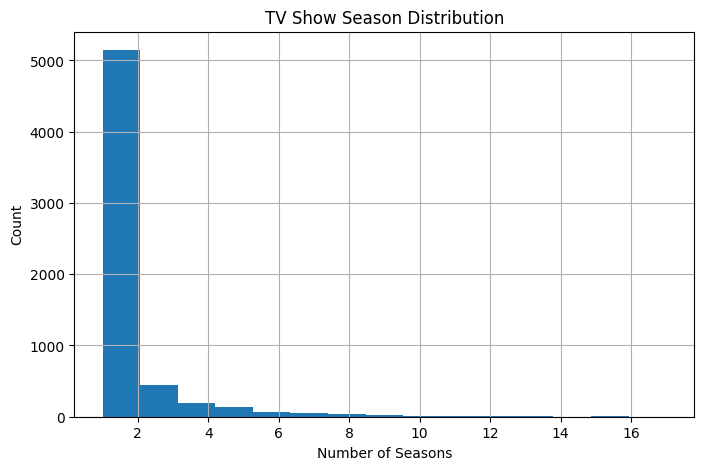

In [33]:
#Tv show season Distribution
plt.figure(figsize=(8,5))

data[data['type']=="TV Show"]['duration_num'].dropna().hist(bins=15)

plt.title("TV Show Season Distribution")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()


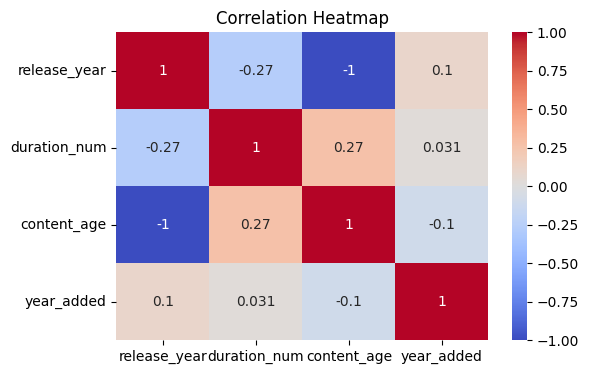

In [34]:
#Correlation
plt.figure(figsize=(6,4))

numeric_cols = ['release_year','duration_num','content_age','year_added']
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()


WORDCLOUD

In [36]:
from wordcloud import WordCloud

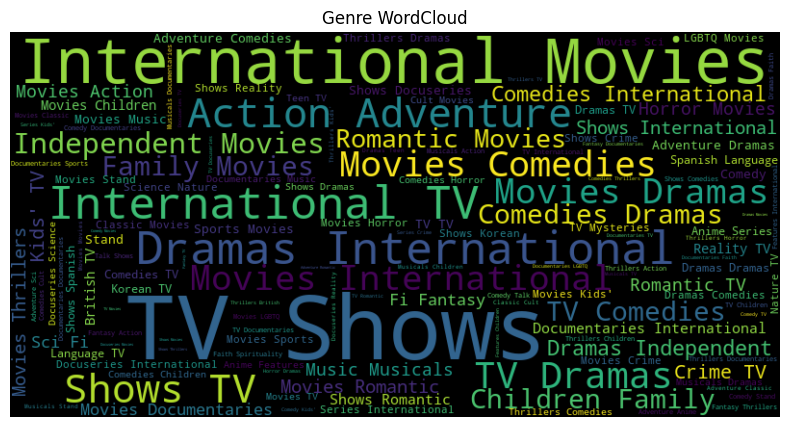

In [37]:
genre_text=" ".join(data['listed_in'])
wc = WordCloud(width=800, height=400, background_color='black').generate(genre_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Genre WordCloud")
plt.show()

ML RECOMMENDATION SYSTEM

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [39]:
data['combined'] = data['title'] + " " + data['listed_in']

tfidf = TfidfVectorizer(stop_words='english')
matrix = tfidf.fit_transform(data['combined'])

similarity = cosine_similarity(matrix)


In [40]:
def recommend(title):
    idx = data[data['title']==title].index[0]
    scores = list(enumerate(similarity[idx]))
    scores = sorted(scores, key=lambda x:x[1], reverse=True)
    for i in scores[1:6]:
        print(data.iloc[i[0]]['title'])


In [41]:
recommend("Sankofa")


Jailbirds New Orleans
Jailbirds
Jailbirds
The New Romantic
Move
